In [7]:
import pandas as pd
import os

In [12]:
os.getcwd()

'/Users/dike/Documents/Jupyter'

In [14]:
df = pd.read_csv('/Users/dike/Downloads/fcc-forum-pageviews.csv')

I will visualize time series data using a line chart, bar chart, and box plots. I will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help me understand the patterns in visits and identify yearly and monthly growth.

In [15]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# Clean data
df = df[(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]


Text(0.5, 0, 'Years')

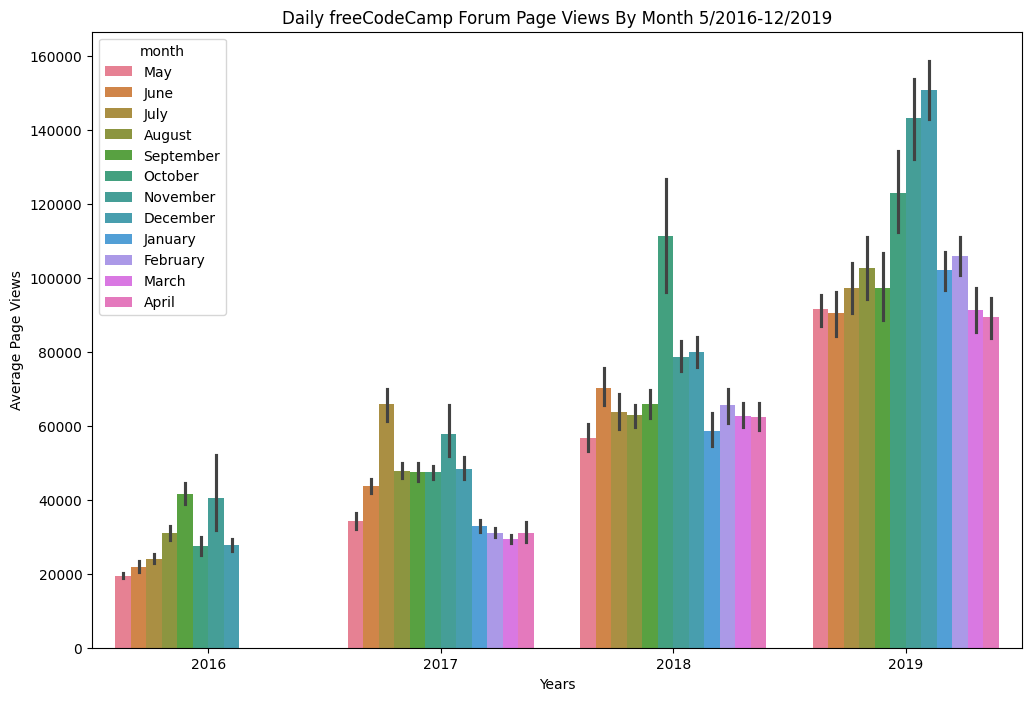

In [17]:
  # Copy and modify data for monthly bar plot
  df['year'] = df.index.year
  df['month'] = df.index.strftime('%B')  # Use '%B' for full month names

  # Draw bar plot
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.set_title('Daily freeCodeCamp Forum Page Views By Month 5/2016-12/2019')

  # Plot data
  sns.barplot(x='year', y='value', hue='month', data=df, ax=ax)

  # Format plot
  ax.set_ylabel('Average Page Views')
  ax.set_xlabel('Years')

The chart signifies yearly increase in page views.
The months; June, July and August seem to be the best performing months.

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

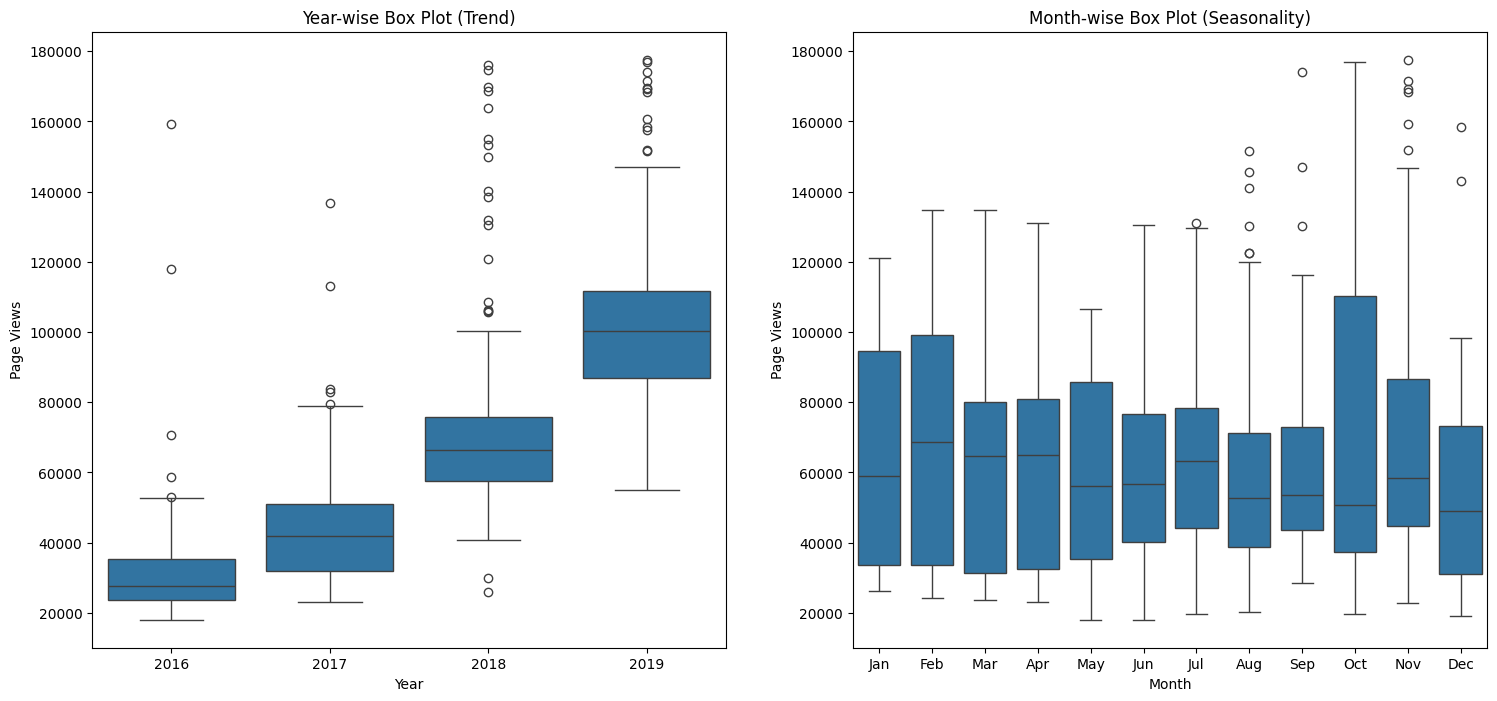

In [18]:
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    # Draw box plots (using Seaborn)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    sns.boxplot(x='month', y='value', data=df_box, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=axes[1])

    # Format plot
    axes[0].set_ylabel('Page Views')
    axes[0].set_xlabel('Year')
    axes[0].set_title('Year-wise Box Plot (Trend)')

    axes[1].set_ylabel('Page Views')
    axes[1].set_xlabel('Month')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')


In [ ]:
October has the most widespread number o

Text(0.5, 0, 'Date')

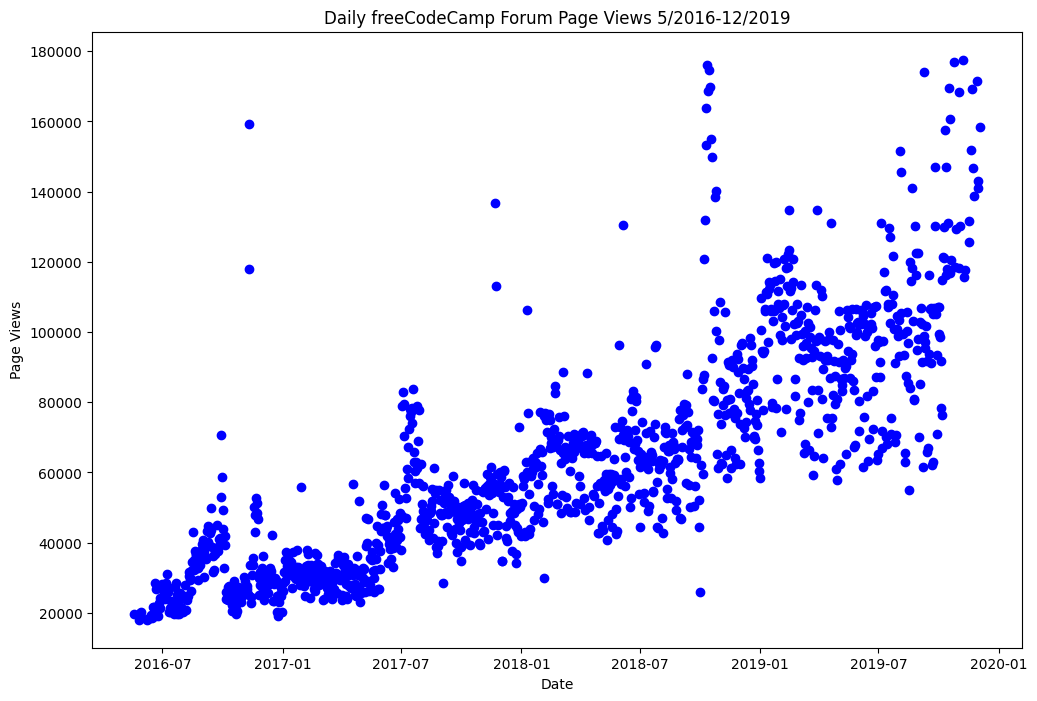

In [20]:
    # Draw line plot

    # Setup axes
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Plot data
    ax.scatter(df.index, df.value, color='blue')

    # Format plot
    ax.set_ylabel('Page Views')   
    ax.set_xlabel('Date')